#### Zadanie 10_1

#### Zadanie: analiza statystyczna

##### Dokonaj statystycznej analizy (obliczenie średniej, kwartyli czy wykresów pudełkowych) dla zmiennej Fare (opłata). Wynik pracy prześlij Mentorowi jako Jupyter Notebook zapisany na GitHub

In [113]:
# manipulacja danymi
import numpy as np
import pandas as pd

In [114]:
# wizualizacja danych
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# statystyczna analiza danych
from scipy import stats

In [116]:
# przygotowanie danych
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [117]:
#pobranie danych
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [118]:
# pobranie wartości z kolumny Fare, bez wartości zerowych
fare_values = dataset.loc[dataset['Fare'].notnull(), 'Fare'].values
print(fare_values.shape)

(891,)


In [119]:
df=dataset.loc[(dataset['Fare']==0)  ]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


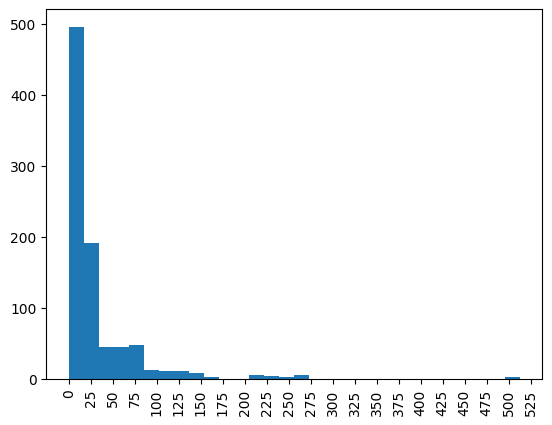

In [120]:
# histogram
plt.hist(fare_values, bins=30)
plt.xticks(np.arange(0, 550, 25)) # Znacznikco 25
plt.xticks(rotation=90)
plt.show()

najwiecej opat było w zakresie 0-30 $

#### Średnia / mean

In [121]:
# obliczenie średniej
mean_fare = np.round(np.mean(fare_values))
print(mean_fare)

32.0


średani opłata 32

#### min / max

In [135]:
#min ,max
min_fare = np.min(fare_values)
print(min_fare)

0.0


In [134]:
#max
max_fare = np.max(fare_values)
print(max_fare)

512.3292


najtansza opłata wynosiła 0, zaś najdroższa 512.3292

#### Mediana

In [124]:
#obliczenie mediany, wartość środkowa
median_fare = np.median(fare_values)
print(median_fare)

14.4542


mediana (wartość środkowa) dla opłaty /fare wyosiła 32

#### moda

In [133]:
#moda
mode_fare = stats.mode(fare_values)
print(mode_fare)

ModeResult(mode=np.float64(8.05), count=np.int64(43))


najwięcej opłat było na kwotę 8.05 i było ich 43

#### Kwartyle

In [126]:
#kwartyle
q0 = np.quantile(fare_values, 0.0)
q1 = np.round(np.quantile(fare_values, 0.25))
q3 = np.round(np.quantile(fare_values, 0.75))
q4 = np.round(np.quantile(fare_values, 1.0))
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.0
Q1: 8.0
Q2: 14.4542
Q3: 31.0
Q4: 512.0


Najmniejża opat/ fate wynosiła 0$, zaś najdroższa 512$.
Pierwszy kwartyl Q1, to wartość dla której  25& jest wieksza
Q2 mediana, ktra dzieliobseracja na 2 częsci
Q3 75% operacji , 25 % 

#### Histogram

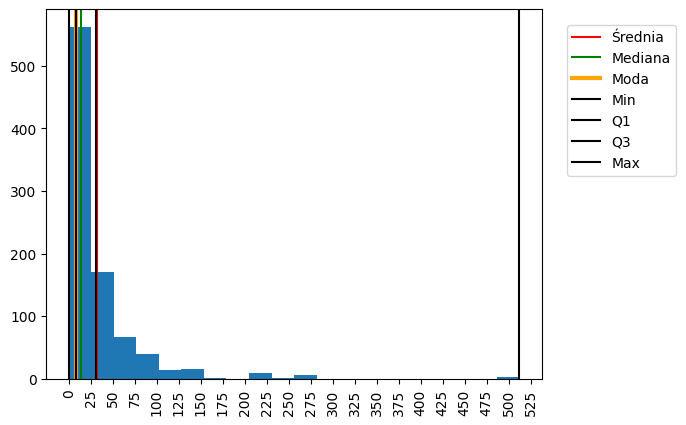

In [141]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda',lw=3)
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc=(1.05,0.55))
plt.xticks(np.arange(0, 550, 25)) # Znacznikco 25
plt.xticks(rotation=90)
plt.show()

średnia - 32.0 <br>
min - 0   <br>
max -512.3292   <br>
mediana 14.4542   <br>
moda - 8.05    <br>

kwartyle 
Q0 = min = 0  <br>
q1 = 8 ; wartośc poniżej której 25% obserwacji jest poniżej tej wartości  <br>
q2 = mediana = 14.4542  <br>
q3 = 31; warość powyżej której 75% wartośc jest mniejszych, zaś 25% większych  <br>
q4 = max = 512.3292  <br>

Histogram jest pozytywnie śkośny (positive skew) - najpierw moda, następnie mediana, a następnie średnia <br>

Więcej było najtanszych biletów (/fare) niż tych droższych, najwiećej buletów było od 0-15$

#### Zakres

In [127]:
range_fare = max(fare_values) - min(fare_values)
print(range_fare)

512.3292


w zbiorze danych zakres danych to ponad 512 ($)

#### Rozstęp międzykwartylowy - IQR

In [128]:
iqr = q3 - q1
print(iqr)

23.0


Rozstęm miedzykwarylowy IQR, rozstęp miedzy 25 percentylem, a 75 percentlyem wynosi 23

#### Wykres pudełkowy

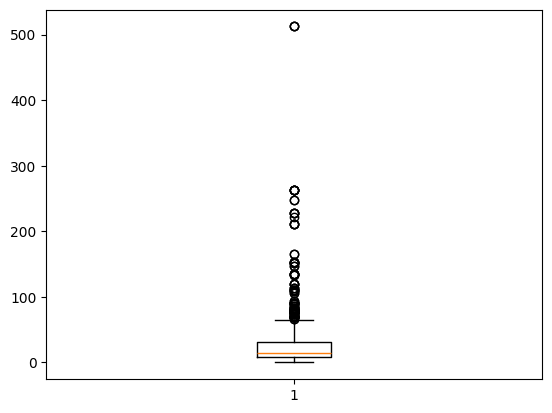

In [129]:
plt.boxplot(fare_values)
plt.show()

#### Wariancja

In [130]:
variance_fare = np.var(fare_values, ddof=1)
print(variance_fare)

2469.436845743116


#### Odchylenie standardowe

In [131]:
standard_deviation_fare = np.std(fare_values, ddof=1)
print(standard_deviation_fare)

49.6934285971809
